# 코랩 실습  모표준편차, 신뢰구간, n값, t분포

실습을 위한 쥬피터 노트북 파일

[20251209 tm.ipynb](attachment:1dd8c1d7-3573-4f61-ad61-102cf8bbaa0e:20251209_tm.ipynb)

# 궁금 사항

1. 모표준편차가 몇인지?
2. t분포 신뢰구간이 z분포보다 왜 더 작게 나오는지?

# 결론부터 말하면

1. 모표준편차는 10이다 (아래에 추가 설명 있음)
2. t분포 신뢰구간이 더 작게 나오는 이유는

# t분포 신뢰구간이 더 작게(좁게) 나오는 이유

1. sigma = 15 라고 잘못 세팅돼서 z분포 신뢰구간이 더 길어졌다.
2. 표본 크기 n=30 이라서 z분포 t분포 생김새가 거의 비슷해졌다.
    
    (t분포 꼬리가 유의미하게 뚱뚱하려면 n값이 더 작아야함)
    
3. 실습 코드를 실행할 때마다 표본 표준편차가 달라지므로 (당연히 표본마다 달라지는 게 맞다)
    
    표본 표준편차가 우연히 작은 경우 표준오차(SE)가 영향을 받아 t분포의 신뢰구간이 더 작아진다(좁아진다)
    

바른 결과를 얻기 위해 코드를 일부 수정했습니다.

추가한 코드 및 주석은 #을 2개 달아 구분하였습니다.

##이렇게 붙여두었으니 ##을 읽으면서 내려가면 됩니다.

(쥬피터 노트북 파일을 받아 직접 실행해보셔도 됩니다.)

In [296]:
# 문제 5. 신뢰구간 계산과 해석
# 📘 문제

# 표본 평균은 모집단 평균을 추정하는 좋은 점 추정(Point Estimation) 값이지만, 표본오차 때문에 정확히 일치하지는 않습니다.

# 그래서 우리는 "모집단 평균이 아마 이 범위 안에 있을 것이다"라고 **구간으로 추정(Interval Estimation)**하는 것이 더 합리적입니다. 이때 사용하는 개념이 바로 **신뢰구간(Confidence Interval)**입니다.

# 신뢰구간은 표본평균 ± 오차범위 형태로 계산되며, 이 오차범위는 신뢰수준(예: 95%, 99%)과 표본오차에 의해 결정됩니다.

# 이번 실습에서는 **모집단 표준편차(σ)를 알 때(z-분포)**와 **모를 때(t-분포)**의 신뢰구간을 각각 계산해보고, 신뢰수준에 따라 구간의 폭이 어떻게 변하는지 확인해봅니다.

# 📌 아래를 수행해 보세요:

# 모집단에서 30명을 무작위로 뽑아 평균, 표준편차, 표준오차를 계산해보세요.

# 95% 신뢰구간을 z-분포와 t-분포를 각각 사용해서 계산해보세요.

# 신뢰수준을 바꿨을 때(90%, 99%) 신뢰구간이 어떻게 변하는지 확인해보세요.

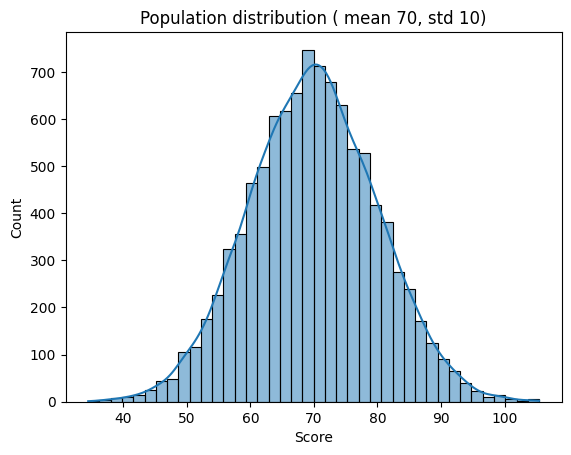

In [297]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 모집단 생성
np.random.seed(2025)
population = np.random.normal(loc=70, scale=10, size=10000)

# 모집단 시각화
sns.histplot(population, bins=40, kde=True)
plt.title("Population distribution ( mean 70, std 10)")
plt.xlabel("Score")
plt.show()

In [305]:
# Q1. 표본 30명을 무작위로 추출하고, 표본 평균, 표준편차, 표준오차 계산


## 원본 코드에서 새롭게 추가한 주석은 구분을 위해 #을 2개 붙였음.
## 이렇게. ##를 읽으면서 내려가면 된다.


## 전체 코드의 표본 크기를 한 번에 조절하기 위해 n_size 변수 선언
## 아래 두 줄의 주석을 조절해서 표본 크기 변화에 따른 결과를 비교하자
n_size = 30 ## n=30 경우
# n_size = 15 ## n=15 경우. z분포는 n<30 에서 안 쓰니까, 이 경우는 t분포 변화만 확인하자.

sample = np.random.choice(population, size=n_size) ## n_size 사용
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)  # 표본 표준편차 (ddof=1)
# sample_std = 9.6 ## 실험용 std 고정
se = sample_std / np.sqrt(n_size)    # 표준오차  ## n_size 사용

print(f"표본 평균: {sample_mean:.2f}")
print(f"표본 표준편차: {sample_std:.2f}")
print(f"표준오차(SE): {se:.2f}")

## 모표준편차 직접 구하기
pop_std = np.std(population, ddof=1)  ## 원래 모표준편차면 ddof=0 이 맞지만, 이건 엄밀히 말하면 아주 큰 표본이므로 ddof=1 사용
print(f"모표준편차: {pop_std}. 근데 엄밀히 말하면 모표준편차 아님")

## 이게 진짜 모표준편차가 아닌 이유? 정확히 10이 나오지 않는 이유?
## 모표준편차는 문제 세팅에서 10으로 약속되어있음.
## 그런데 실제로 10이 나오지 않는 이유는 이게 진짜 모집단이 아니라 모집단 흉내라서 그렇다.

## population = np.random.normal(loc=70, scale=10, size=10000)
## 모집단 생성에서 명령한 위 코드의 의미는 평균 70, 표준편차 10 정규분포에서 10,000개의 데이터를 무작위 추출하라는 뜻.
## 그래서 이건 모집단이 아니라 아주 큰 표본임.
## 따라서 모표준편차가 아니라 표본 표준편차다.
## 하지만 실습 환경의 한계로 무한 모집단을 사용할 수 없기 떄문에 가상의 유한 모집단을 만든 것이다.
## 표본 표준편차는 일치성 추정량이므로, n이 엄청나게 커지면 모수와 일치(수렴)하기 때문에 문제 없다.


표본 평균: 69.66
표본 표준편차: 9.80
표준오차(SE): 1.79
모표준편차: 10.005597498861858. 근데 엄밀히 말하면 모표준편차 아님


In [306]:
# Q2. 모집단 표준편차를 알고 있다고 가정하고, z-분포로 95% 신뢰구간 계산

sigma = pop_std  # 모집단 표준편차를 알고 있다고 가정   ## 원래 코드의 15 대신 위에서 구한 모표준편차 pop_std 그대로 넣어주기
z = 1.96    # 95% 신뢰수준에서의 z값

ci_low = sample_mean - z * (sigma / np.sqrt(n_size))    ## n_size 사용
ci_high = sample_mean + z * (sigma / np.sqrt(n_size))   ## n_size 사용
ci_width = ci_high - ci_low ## 신뢰구간 길이를 바로 확인하기 위해 추가

print(f"[z-분포 기반] 95% 신뢰구간: ({ci_low:.2f}, {ci_high:.2f})")
print(f"신뢰구간 길이: {(ci_width):.2f}") ## 신뢰구간 길이를 바로 확인하기 위해 추가

[z-분포 기반] 95% 신뢰구간: (66.08, 73.24)
신뢰구간 길이: 7.16


In [ ]:
# Q3. 모집단 표준편차를 모른다고 가정하고, t-분포로 95% 신뢰구간 계산

from scipy import stats

t = stats.t.ppf(0.975, df=n_size-1)  # df = n - 1 = 29   ## 기존 코드 대신 n_size-1 사용
# _____를 채워주세요.
ci_low_t = sample_mean - t * se     ## 표준오차 se를 바로 넣어준다
ci_high_t = sample_mean + t * se    ## 표준오차 se를 바로 넣어준다
ci_width_t = ci_high_t - ci_low_t ## 신뢰구간 길이를 바로 확인하기 위해 추가

print(f"[t-분포 기반] 95% 신뢰구간: ({ci_low_t:.2f}, {ci_high_t:.2f})")
print(f"신뢰구간 길이: {(ci_width_t):.2f}") ## 신뢰구간 길이를 바로 확인하기 위해 추가

## 설명
print(f"\n신뢰구간 길이 비교\nz분포: {ci_width:.2f}\nt분포: {ci_width_t:.2f}\nt분포 신뢰구간이 더 큰가? {ci_width_t > ci_width}")
print(f"표본 표준편차: {sample_std:.2f}")
print("(단, sampled_std 표본 표준편차가 9.6 미만이면 se 표준오차가 영향을 받아 t분포 신뢰구간 길이가 작아짐. 코드를 Q1부터 재실행하여 표본을 다시 뽑을 것.)")
print("\nRun All을 해도 표본 표준편차가 바뀌지 않고 그대로 유지됨. np.random.seed(2025) 재현을 위한 이 코드 때문인데")
print("Q1 셀부터 수동 재실행해서 표본을 다시 뽑으면 된다.")

[t-분포 기반] 95% 신뢰구간: (66.00, 73.32)
신뢰구간 길이: 7.32

신뢰구간 길이 비교
z분포: 7.16
t분포: 7.32
t분포 신뢰구간이 더 큰가? True
표본 표준편차: 9.80
(단, sampled_std 표본 표준편차가 9.6 미만이면 se 표준오차가 영향을 받아 t분포 신뢰구간 길이가 작아짐. 코드를 Q1부터 재실행하여 표본을 다시 뽑을 것.)

Run All을 해도 표본 표준편차가 바뀌지 않고 그대로 유지됨. np.random.seed(2025) 재현을 위한 이 코드 때문인데
Q1 셀부터 수동 재실행해서 표본을 다시 뽑으면 된다.


In [308]:
# Q4. 신뢰수준을 90%, 99%로 바꿔가며 t-분포 기반 신뢰구간 계산

# 90%
t_90 = stats.t.ppf(0.95, df=n_size-1)  # 양쪽 각각 5%       ## n_size-1 사용
ci90 = (sample_mean - t_90 * se, sample_mean + t_90 * se)

# 99%
t_99 = stats.t.ppf(0.995, df=n_size-1)  # 양쪽 각각 0.5%    ## n_size-1 사용
ci99 = (sample_mean - t_99 * se, sample_mean + t_99 * se)

print(f"[t-분포 기반] 90% 신뢰구간: ({ci90[0]:.2f}, {ci90[1]:.2f})")
print(f"[t-분포 기반] 99% 신뢰구간: ({ci99[0]:.2f}, {ci99[1]:.2f})")

[t-분포 기반] 90% 신뢰구간: (66.62, 72.70)
[t-분포 기반] 99% 신뢰구간: (64.72, 74.59)
